In [1]:
#Import Library
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Import the dataset
dataset = pd.read_csv('DataTest.csv')
X = dataset.iloc[:, 1:6].values
y = dataset.iloc[:, 0].values

In [3]:
# Covert string column to empty cell for processing
X = np.where(X == '"' ,np.nan, X)

#Take care of missing data 
from sklearn.impute import SimpleImputer
# Replace numerical values with mean
imputer = SimpleImputer(missing_values=np.nan, strategy = 'mean')
imputer.fit_transform(X[:, 0:3])
X[:, 0:3] = imputer.transform(X[:, 0:3])
# Replace string values with most frequent
imputer2 = SimpleImputer(missing_values=np.nan, strategy = 'most_frequent')
imputer2.fit_transform(X[:, 4:])
X[:, 4:] = imputer2.transform(X[:, 4:])


In [4]:
# Describe data for insight
X_pd = pd.DataFrame(X, columns= ['Beds','Baths','Loft','Garden')
X_pd.describe(include='all') 

,Beds,Baths,Loft,Garden,Property type
count,125.0,125.0,125.0,125,125
unique,8.0,6.0,2.0,2,12
top,3.0,1.0,0.0,1,flat
freq,58.0,68.0,112.0,109,31


<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

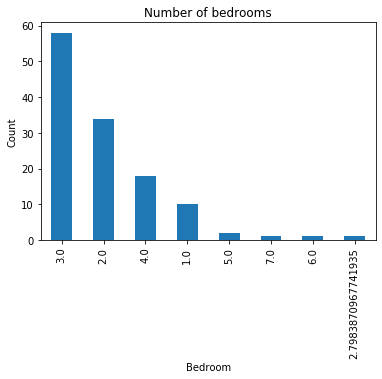

In [5]:
#Determine the most common house bedroom wise
X_pd['Beds'].value_counts().plot(kind='bar')
plt.title('Number of bedrooms')
plt.xlabel('Bedroom')
plt.ylabel('Count')
sns.despine

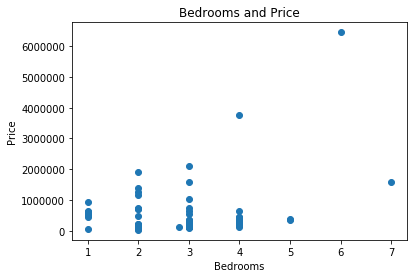

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [6]:
# Determine the relationship between price and bedrooms
plt.scatter(X_pd['Beds'], y)
plt.title("Bedrooms and Price")
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.show()
sns.despine

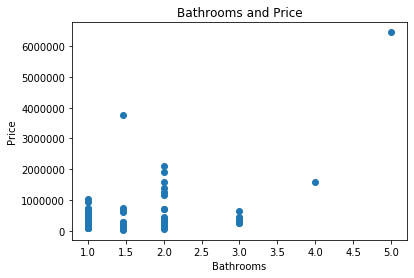

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [7]:
# Determine the relationship between price and bathrooms
plt.scatter(X_pd['Baths'], y)
plt.title("Bathrooms and Price")
plt.xlabel('Bathrooms')
plt.ylabel('Price')
plt.show()
sns.despine

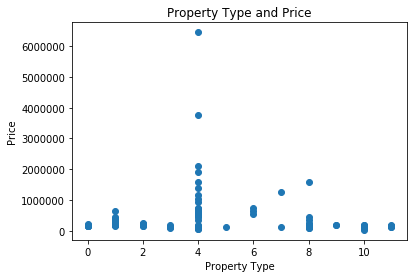

['bungalow' '0' 'detached' '1' 'detached_bungalow' '2' 'end_terrace' '3'
 'flat' '4' 'land' '5' 'maisonette' '6' 'mews' '7' 'semi_detached' '8'
 'semi_detached_bungalow' '9' 'terraced' '10' 'town_house' '11']


In [9]:
# Relationship between price and property type
arr = X[:, 4]
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
arr = le.fit_transform(arr)

plt.scatter(arr, y)
plt.title("Property Type and Price")
plt.xlabel('Property Type')
plt.ylabel('Price')
plt.show()

def countList(lst1, lst2): 
    return np.array([[i, j] for i, j in zip(lst1, lst2)]).ravel()

lst11 = list(le.classes_)
lst12 = list(range(19))
print(countList(lst11,lst12))

In [ ]:
# Label encode the post code
Data_final['Post Code'] = pc_label
# Label encode the property type
le3 = LabelEncoder()
arr3 = Data_final
arr3 = le3.fit_transform(arr)
Data_final['Property type'] = arr3

In [ ]:
#Split dataset into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)